## Image EDA

**Exploring the images in the Florida Wildlife Image Dataset.**

Image dataset comes from UCF's Florida Wildlife Camera Traps Dataset:
https://www.crcv.ucf.edu/research/projects/florida-wildlife-camera-trap-dataset/

### Imports and Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from pathlib import Path
import glob
import PIL
import random
from PIL import Image
from google.colab import drive
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train = train_gen.flow_from_directory(
    '/content/drive/MyDrive/Wildlife Capstone/wildlife_data/train',
    target_size=(256,256),
    class_mode = 'binary'
    )
test = test_gen.flow_from_directory(
    '/content/drive/MyDrive/Wildlife Capstone/wildlife_data/test',
    target_size=(256,256),
    class_mode = 'binary'
    )

Found 3542 images belonging to 2 classes.
Found 754 images belonging to 2 classes.


In [ ]:
train_labels_df = pd.DataFrame(train.labels)
test_labels_df = pd.DataFrame(test.labels)
train_labels_df.rename(columns={0:'classes'}, inplace=True)
test_labels_df.rename(columns={0:'classes'}, inplace=True)

### Class Count EDA

The classes for this wildlife binary classification task are Florida bobcats and panthers.

The train set contains 1624 bobcat camera trap images and 1918 panther camera trap images.

The test set contains 370 bobcat camera trap images and 384 panther camera trap images.

In [ ]:
train.class_indices

{'Bobcats': 0, 'Panthers': 1}

Train Set

In [ ]:
train_labels_df.value_counts(normalize=True)

classes
1          0.541502
0          0.458498
dtype: float64

The training set is slightly unbalanced, having more images for panthers than for bobcats.

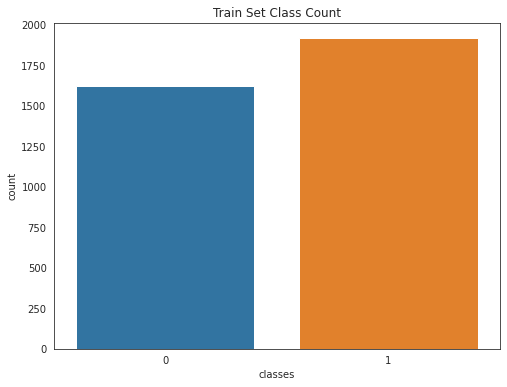

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(8,6))
sns.countplot(x='classes',data=train_labels_df)
plt.title('Train Set Class Count');

Test Set

In [ ]:
test_labels_df.value_counts(normalize=True)

classes
1          0.509284
0          0.490716
dtype: float64

The test set is almost even in classes, though it still favors the panther class.

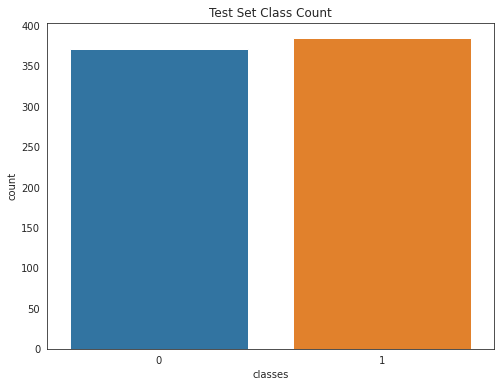

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='classes',data=test_labels_df)
plt.title('Test Set Class Count');

#### Train and Test Images Dataframe

Creating a dataframe of the height, width, bits, and bands by class for each image in both the training and test sets. 

All images come from camera traps set in trails located in Corkscrew Swamp (Corkscrew) and Okaloacoochee Slough State Forest (OKSSF) in South Florida.

This dataframe is used to check whether or not the image features are the same for all images.

In [ ]:
# https://docs.python.org/3/library/pathlib.html
# https://stackoverflow.com/questions/42074311/loop-through-directory-of-images-and-rotate-them-all-x-degrees-and-save-to-direc
# https://www.geeksforgeeks.org/how-to-iterate-through-images-in-a-folder-python/

bcimages = []
ptimages = []

train_bc_path = Path('/content/drive/MyDrive/Wildlife Capstone/wildlife_data/train/Bobcats').glob('*.JPG')
train_pt_path = Path('/content/drive/MyDrive/Wildlife Capstone/wildlife_data/train/Panthers').glob('*.JPG')
test_bc_path = Path('/content/drive/MyDrive/Wildlife Capstone/wildlife_data/test/Bobcats').glob('*.JPG')
test_pt_path = Path('/content/drive/MyDrive/Wildlife Capstone/wildlife_data/test/Panthers').glob('*.JPG')

for img in train_bc_path:
  bcimages.append(load_img(img))
for img in train_pt_path:
  ptimages.append(load_img(img))
for img in test_bc_path:
  bcimages.append(load_img(img))
for img in test_pt_path:
  ptimages.append(load_img(img))

len(bcimages), len(ptimages)

(1994, 2302)

In [ ]:
class_name = []
height = []
width = []
bits  = []
bands = []


for img in bcimages:
  class_name.append('bobcat')
  height.append(img.height)
  width.append(img.width)
  bits.append(img.bits)
  bands.append(img.getbands())


for img in ptimages:
  class_name.append('panthers')
  height.append(img.height)
  width.append(img.width)
  bits.append(img.bits)
  bands.append(img.getbands())


In [ ]:
df_images = pd.DataFrame()
df_images['class_name'] = class_name
df_images['height'] = height
df_images['width'] = width
df_images['bits'] = bits
df_images['bands'] = bands


In [ ]:
df_images

class_name  height  width  bits      bands
0        bobcat    1080   1920     8  (R, G, B)
1        bobcat    1080   1920     8  (R, G, B)
2        bobcat    1080   1920     8  (R, G, B)
3        bobcat    1080   1920     8  (R, G, B)
4        bobcat    1080   1920     8  (R, G, B)
...         ...     ...    ...   ...        ...
4291   panthers    1080   1920     8  (R, G, B)
4292   panthers    1080   1920     8  (R, G, B)
4293   panthers    1080   1920     8  (R, G, B)
4294   panthers    1080   1920     8  (R, G, B)
4295   panthers    1080   1920     8  (R, G, B)

[4296 rows x 5 columns]

In [ ]:
df_images['bits'].unique()

array([8])

In [ ]:
# Only RBG channels for all images
df_images['bands'].unique()

array([('R', 'G', 'B')], dtype=object)

There are differences in the width and height amoung the images.

In [ ]:
df_images['height'].value_counts(normalize=True)

1080    0.841946
1832    0.152235
2160    0.005819
Name: height, dtype: float64

In [ ]:
df_images['width'].value_counts(normalize=True)

1920    0.841946
3264    0.152235
3840    0.005819
Name: width, dtype: float64

Most of the pixel counts for these sampled images fall within the range between 0 and 25000. 

### Image EDA

#### **The Differences between two images:** 
Single sample image from each class

With all images coming from the camera traps set within the same locations, differentiating between the classes falls entirely on the differences in appearance. 

`Bobcats`


Bobcats are generally smaller and have a shorter tail in appearance when compared to panthers. 


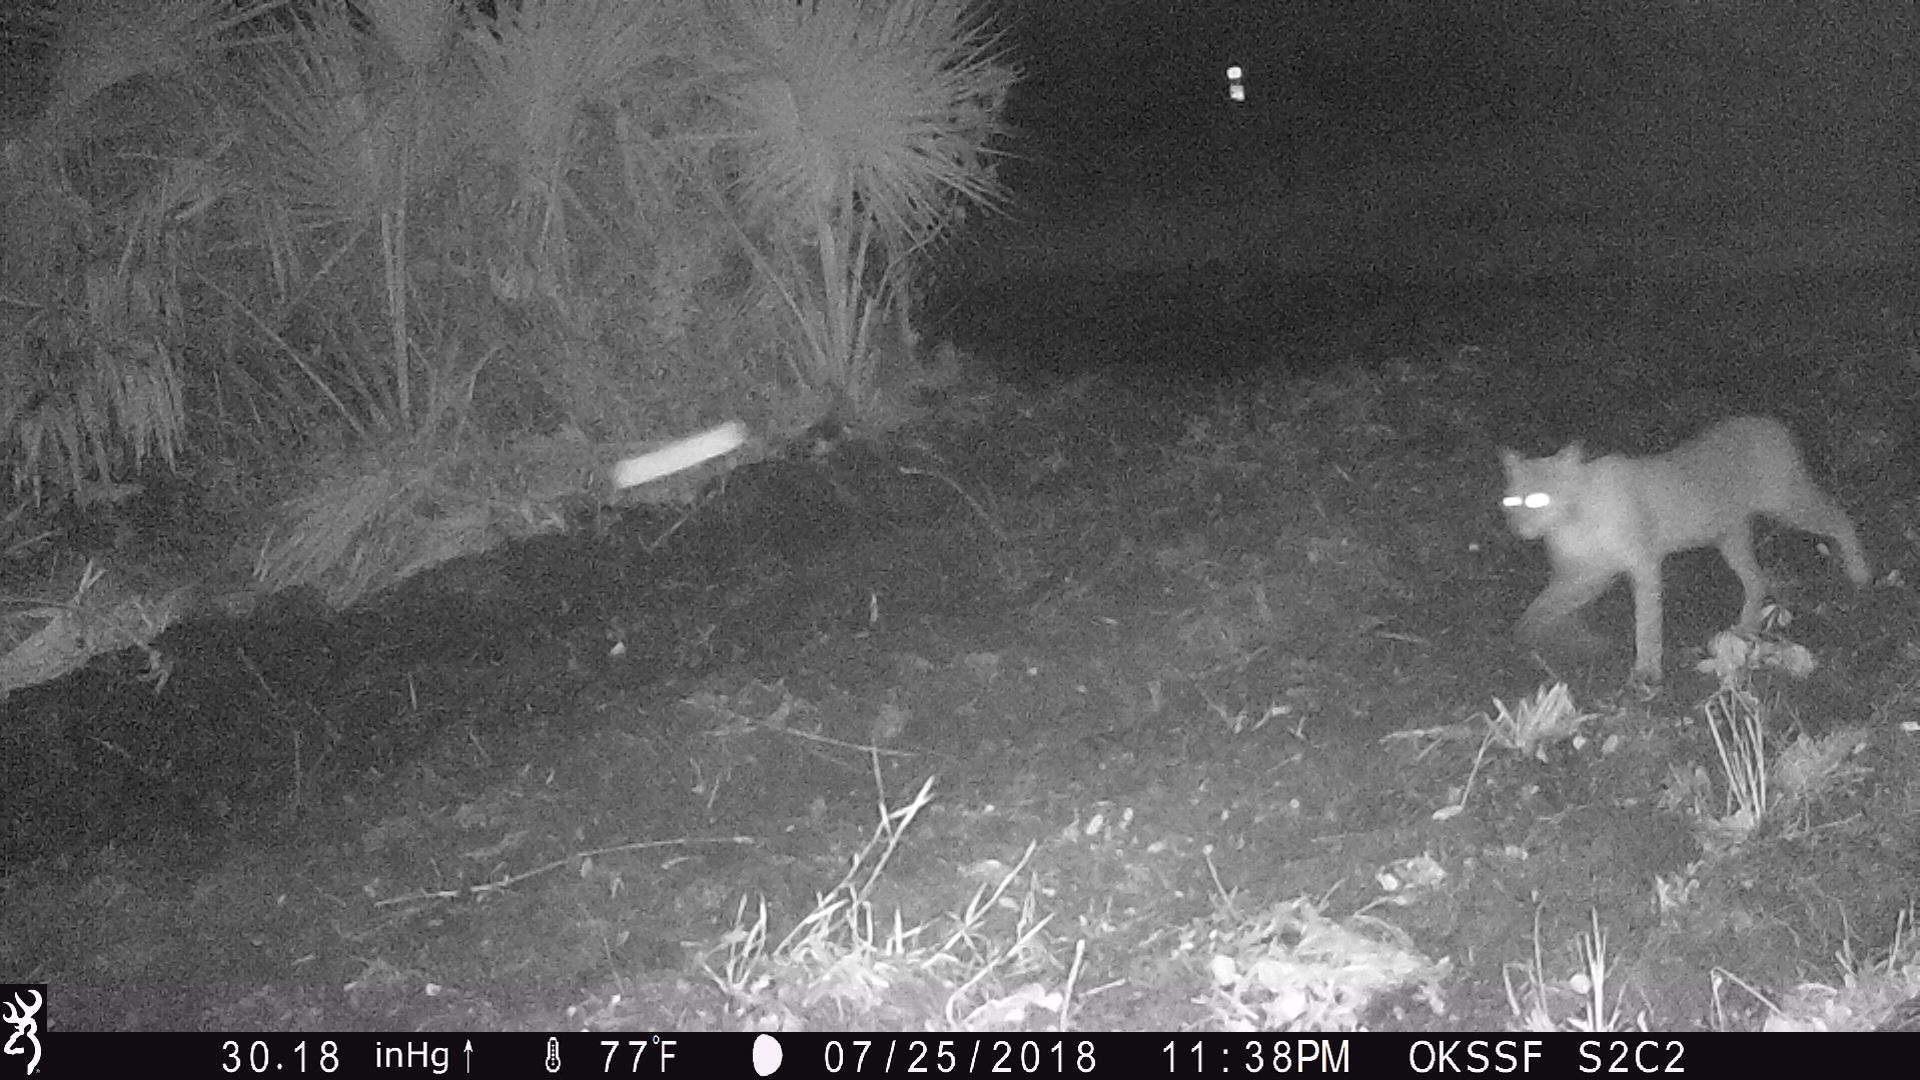

In [ ]:
Bobcat_img = load_img('/content/drive/MyDrive/Wildlife Capstone/wildlife_data/train/Bobcats/IMG_0856.JPG')
Bobcat_img

- Pixel Count Range for this single image:

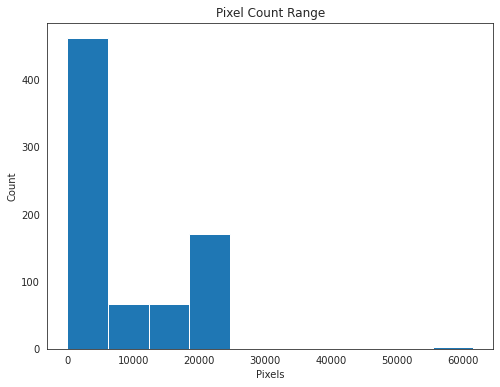

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Pixel Count Range')
plt.xlabel('Pixels')
plt.ylabel('Count')
plt.hist(Bobcat_img.histogram());

- Pixel Stats for this Image(Per Color Channel):

- ex. [Red, Green, Blue]

In [ ]:
PIL.ImageStat.Stat(Bobcat_img).mean

[93.88285879629629, 93.57996527777777, 93.9650925925926]

In [ ]:
PIL.ImageStat.Stat(Bobcat_img).count

[2073600, 2073600, 2073600]

In [ ]:
PIL.ImageStat.Stat(Bobcat_img).sum

[194675496.0, 194047416.0, 194846016.0]

In [ ]:
PIL.ImageStat.Stat(Bobcat_img).var

[1732.9970775140123, 1748.1688196747207, 1732.688317545439]

In [ ]:
PIL.ImageStat.Stat(Bobcat_img).stddev

[41.62928149168578, 41.81110880704697, 41.62557287948646]

In [ ]:
PIL.ImageStat.Stat(Bobcat_img).median

[90, 90, 90]

`Panthers`


Panthers are generally bigger wildcats with longer tails when compared to bobcats.

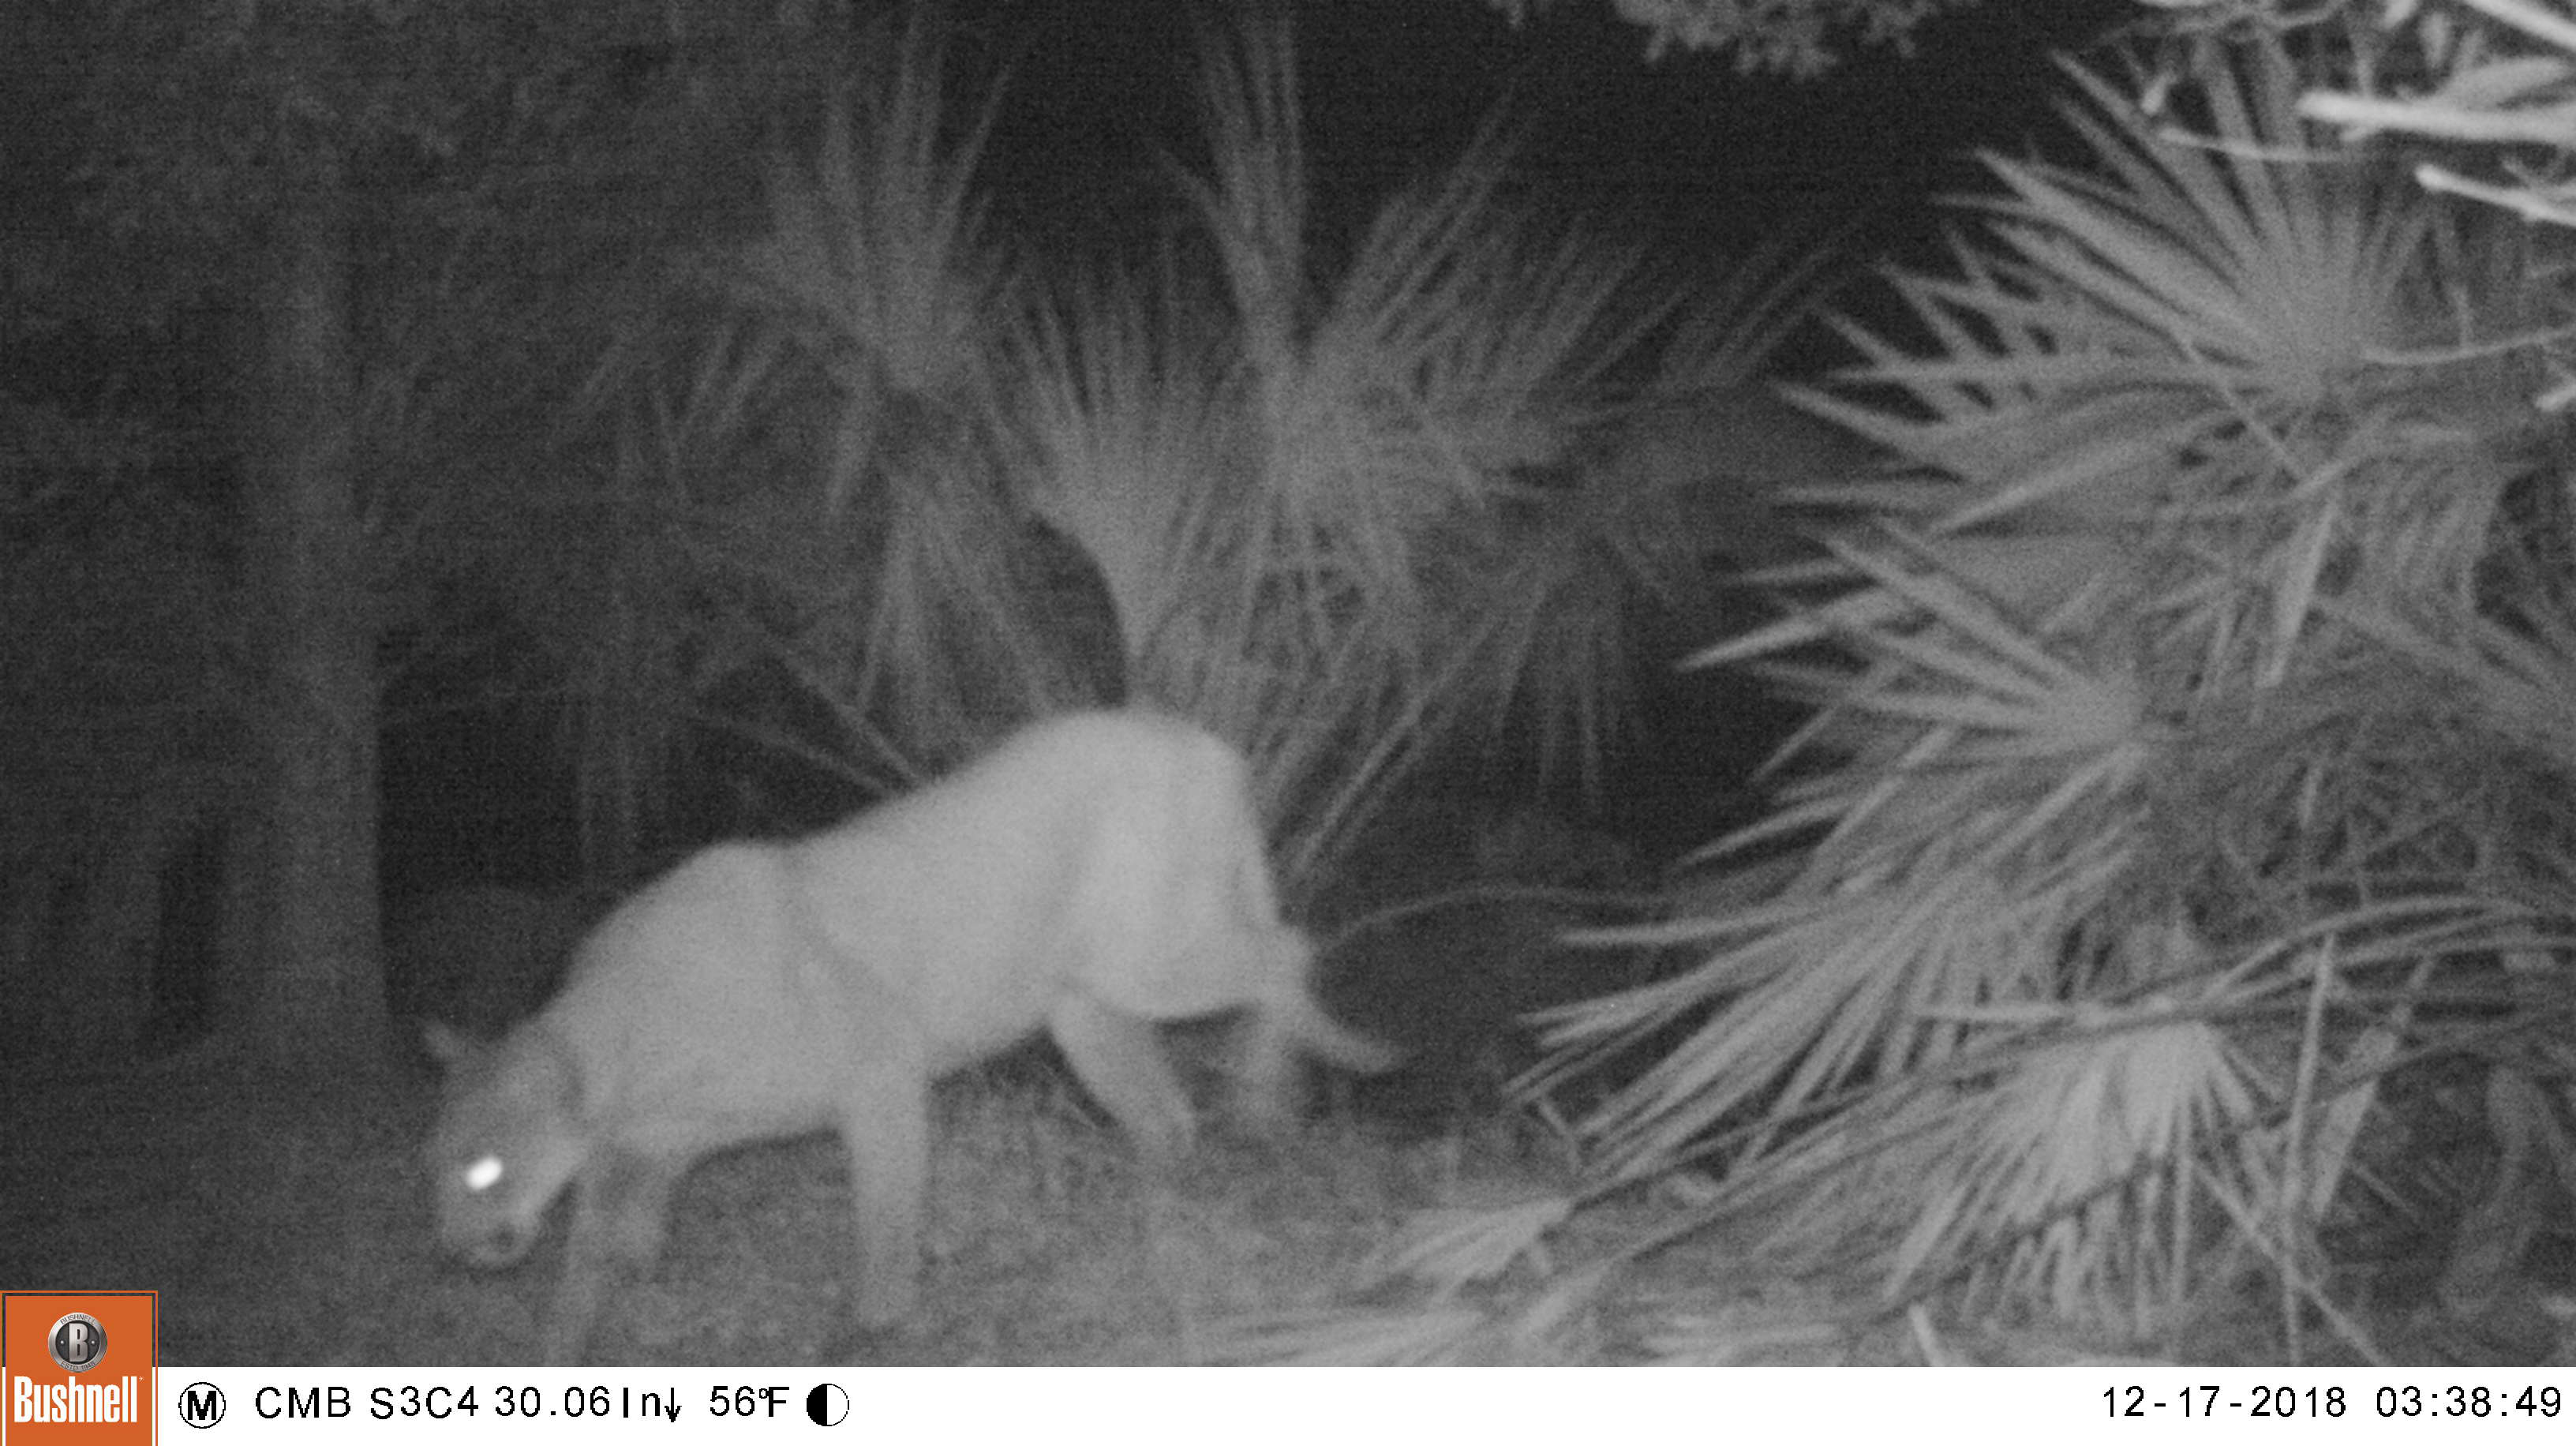

In [ ]:
Panther_img = load_img('/content/drive/MyDrive/Wildlife Capstone/wildlife_data/train/Panthers/EK000018 (4).JPG')
Panther_img

- Pixel Count Range for this single image:

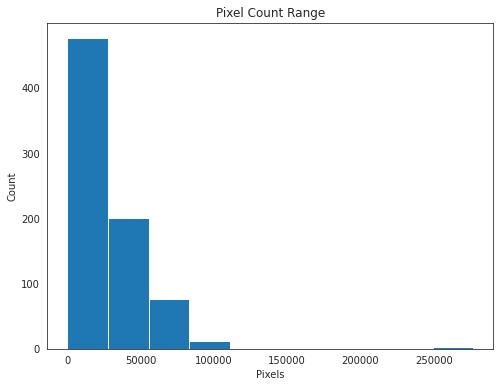

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Pixel Count Range')
plt.xlabel('Pixels')
plt.ylabel('Count')
plt.hist(Panther_img.histogram());

- Pixel Stats for this Image(Per Color Channel):

- ex. [Red, Green, Blue]

In [ ]:
PIL.ImageStat.Stat(Panther_img).mean

[90.65058010103604, 90.1423453353776, 89.88709034377943]

In [ ]:
PIL.ImageStat.Stat(Panther_img).count

[5979648, 5979648, 5979648]

In [ ]:
PIL.ImageStat.Stat(Panther_img).sum

[542058560.0, 539019495.0, 537493160.0]

In [ ]:
PIL.ImageStat.Stat(Panther_img).var

[2677.83791341359, 2612.7231747101437, 2619.94065334891]

In [ ]:
PIL.ImageStat.Stat(Panther_img).stddev

[51.74783003579561, 51.114803870406696, 51.18535584861074]

In [ ]:
PIL.ImageStat.Stat(Panther_img).median

[77, 77, 77]

`Bobcat and Panther Pixel Stats Comparision`

Since the only differences the model can learn from to differentiate the two classes are those between the wildcats' appearances (which can appear quite similiar in passing), it could be difficult to classify between these animals, especially when the camera traps can only caputre images of oppurtunity when observing the animals in the wild.

#### Other Image Samples

Histogram of pixel count ranges amoung sample size.

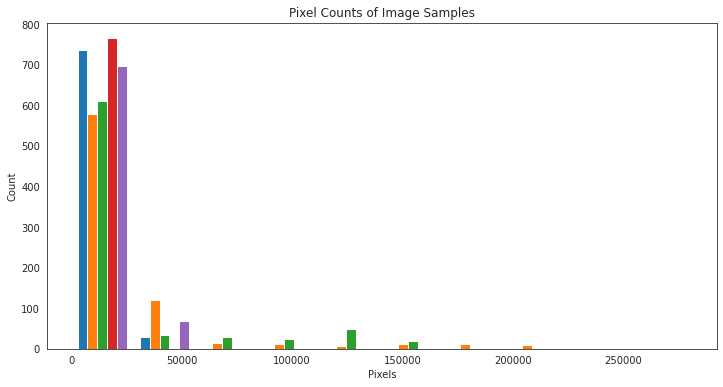

In [ ]:
all_images = bcimages + ptimages
sample = random.sample(all_images, 5)

histo = []
for img in sample:
    histo.append(img.histogram())

plt.figure(figsize=(12,6))
plt.title('Pixel Counts of Image Samples')
plt.xlabel('Pixels')
plt.ylabel('Count')
plt.hist(histo);

### Challenges

Challenges for image classification for this dataset include having images where the animals:

- blend into their environment, making it hard to identify them within an image

- hidden behind other objects, or only shown partially, again making it hard to both identify and classify

- captured in motion, so many images have visible motion blur

- have fewer images that clearly capture the whole animal


But this is the nature of the images captured while observing animals in the wild. So, instead of filtering the image dataset to only contain clear images of the bobcats and panthers, the focus will be on building a model that can classify them in their natural state with relatively high accuracy. 




### Code Credits

https://seaborn.pydata.org/generated/seaborn.countplot.html


https://www.tensorflow.org/tutorials/images/classification

https://pillow.readthedocs.io/en/stable/

https://docs.python.org/3/library/pathlib.html

https://docs.python.org/3/library/os.html

https://pillow.readthedocs.io/en/stable/reference/Image.html

https://pillow.readthedocs.io/en/stable/reference/ImageStat.html

https://stackoverflow.com/questions/43416191/python-random-sample

https://pillow.readthedocs.io/en/stable/reference/ImageStat.html